# Illuminating Insights for Global Electronics

### Importing packages

In [30]:
!pip install mysql-connector-python==8.4.0

   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
    --------------------------------------- 0.3/14.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/14.5 MB 1.9 MB/s eta 0:00:08
   - -------------------------------------- 0.5/14.5 MB 1.9 MB/s eta 0:00:08
   - -------------------------------------- 0.5/14.5 MB 1.9 MB/s eta 0:00:08
   - -------------------------------------- 0.5/14.5 MB 1.9 MB/s eta 0:00:08
   -- ------------------------------------- 0.8/14.5 MB 578.0 kB/s eta 0:00:24
   -- ------------------------------------- 0.8/14.5 MB 578.0 kB/s eta 0:00:24
   -- ------------------------------------- 0.8/14.5 MB 578.0 kB/s eta 0:00:24
   -- ------------------------------------- 1.0/14.5 MB 470.4 kB/s eta 0:00:29
   -- ------------------------------------- 1.0/14.5 MB 470.4 kB/s eta 0:00:29
   --- ------------------------------------ 1.3/14.5 MB 504.4 kB/s eta 0:00:27
   --- ------------------------------------ 1.3/14.5 MB 504.4 kB/s eta 0:00:27

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import csv
import mysql.connector as db 
from datetime import date


### Reading csv files and checking for null values

In [11]:
data_cust=pd.read_csv('Customers (2).csv',encoding='ISO-8859-1')

In [13]:
data_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [15]:
data_cust['Birthday'] = data_cust['Birthday'].astype('datetime64[ns]')

In [22]:
data_cust.isnull().sum()

CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
dtype: int64

In [41]:
data_cust['State Code'].value_counts()

State Code
CA                      740
ON                      644
IL                      597
TX                      522
NSW                     430
                       ... 
Newcastle                 1
Basildon                  1
Reigate and Banstead      1
Barnet                    1
Christchurch              1
Name: count, Length: 467, dtype: int64

In [42]:
data_cust['State Code'].mode()

0    CA
Name: State Code, dtype: object

In [11]:
data_cust[['State Code']].isnull().sum()


State Code    0
dtype: int64

In [37]:
data_cust.iloc[5316,::]

CustomerKey          732289
Gender                 Male
Name           Indro Piccio
City              Varcaturo
State Code               NA
State                Napoli
Zip Code              80014
Country               Italy
Continent            Europe
Birthday          2/24/1949
Name: 5316, dtype: object

In [17]:
data_st=pd.read_csv('Stores (1).csv',encoding='ISO-8859-1')

In [282]:
mean = data_st['Square Meters'].mean()

In [284]:
data_st['Square Meters'].astype(float)

0      595.0
1      665.0
2     2000.0
3     2000.0
4     2000.0
       ...  
62    2000.0
63    1330.0
64    1785.0
65     840.0
66       NaN
Name: Square Meters, Length: 67, dtype: float64

#mean imputation on continious variable

In [292]:
data=data_st

In [294]:
data_st

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.00000,1/1/2008
1,2,Australia,Northern Territory,665.00000,1/12/2008
2,3,Australia,South Australia,2000.00000,1/7/2012
3,4,Australia,Tasmania,2000.00000,1/1/2010
4,5,Australia,Victoria,2000.00000,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.00000,3/6/2008
63,64,United States,Washington DC,1330.00000,1/1/2010
64,65,United States,West Virginia,1785.00000,1/1/2012
65,66,United States,Wyoming,840.00000,1/1/2014


In [79]:
data_st.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [288]:
data_st['Square Meters']=data_st['Square Meters'].fillna(mean)

In [81]:
data_cust[data_cust['State Code'].isnull()]

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
5304,729681,Female,Rossana Padovesi,Polvica,NaN,Napoli,80035,Italy,Europe,1981-04-18
5316,732289,Male,Indro Piccio,Varcaturo,NaN,Napoli,80014,Italy,Europe,1949-02-24
5372,742042,Male,Amaranto Loggia,Casaferro,NaN,Napoli,80034,Italy,Europe,1936-03-14
5377,742886,Female,Edmonda Capon,Terzigno,NaN,Napoli,80040,Italy,Europe,1963-08-06
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NaN,Napoli,80038,Italy,Europe,1961-01-05
5485,759705,Male,Callisto Lo Duca,Casilli,NaN,Napoli,80047,Italy,Europe,1976-08-28
5525,765589,Male,Michelino Lucchesi,Pompei Scavi,NaN,Napoli,80045,Italy,Europe,1947-11-13
5531,766410,Male,Adelmio Beneventi,Licola,NaN,Napoli,80078,Italy,Europe,1940-01-13
5631,781667,Female,Ilda Manna,Napoli,NaN,Napoli,80134,Italy,Europe,1977-05-08
5695,789177,Male,Calogero Folliero,Mariglianella,NaN,Napoli,80030,Italy,Europe,2000-03-03


In [83]:
data_cust['State Code'].fillna('NA',inplace=True)

C:\Users\Asin\AppData\Local\Temp\ipykernel_25932\3896044556.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cust['State Code'].fillna('NA',inplace=True)


In [46]:
data_sal = pd.read_csv('Sales.csv',encoding='ISO-8859-1')

In [47]:
data_sal.to_csv('data_sal.csv')

In [48]:
data_sal.columns

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code'],
      dtype='object')

In [49]:
data_sal

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [45]:
pd.read_csv('data_sal.csv')

,Unnamed: 0,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19
...,...,...,...,...,...,...,...,...,...,...,...
15261,15261,2099600,Female,Denisa DuÂkovÃ¡,Houston,TX,Texas,77017,United States,North America,1936-03-25
15262,15262,2099618,Male,Justin SolÃ³rzano,Mclean,VA,Virginia,22101,United States,North America,1992-02-16
15263,15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-11-09
15264,15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-10-12


In [ ]:
data_sal['Quantity']

In [67]:
data_sal['CustomerKey'].value_counts()

CustomerKey
723572     36
1579183    32
1925694    32
1942072    29
1972249    29
           ..
974784      1
1068351     1
315725      1
1520217     1
1237927     1
Name: count, Length: 11887, dtype: int64

In [69]:
prod

ProductKey
423     162
446     158
434     158
458     158
448     157
       ... 
2306      1
2346      1
2232      1
2243      1
193       1
Name: count, Length: 2492, dtype: int64

In [25]:
prod = data_sal['ProductKey'].value_counts()

In [56]:
data_sal['Order Date'] = data_sal['Order Date'].astype('datetime64[ns]')

In [57]:
data_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Number   62884 non-null  int64         
 1   Line Item      62884 non-null  int64         
 2   Order Date     62884 non-null  datetime64[ns]
 3   Delivery Date  62884 non-null  object        
 4   CustomerKey    62884 non-null  int64         
 5   StoreKey       62884 non-null  int64         
 6   ProductKey     62884 non-null  int64         
 7   Quantity       62884 non-null  int64         
 8   Currency Code  62884 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 4.3+ MB


In [42]:
data_sal.isnull().sum()

Order Number     0
Line Item        0
Order Date       0
Delivery Date    0
CustomerKey      0
StoreKey         0
ProductKey       0
Quantity         0
Currency Code    0
dtype: int64

In [58]:
data_sal['Delivery Date']=data_sal['Delivery Date'].fillna('yet to be')

In [59]:
data_sal

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,yet to be,265598,10,1304,1,CAD
1,366001,1,2016-01-01,1/13/2016,1269051,0,1048,2,USD
2,366001,2,2016-01-01,1/13/2016,1269051,0,2007,1,USD
3,366002,1,2016-01-01,1/12/2016,266019,0,1106,7,CAD
4,366002,2,2016-01-01,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,yet to be,1216913,43,632,3,USD
62880,2243031,1,2021-02-20,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2021-02-20,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2021-02-20,2/23/2021,331277,0,1717,2,CAD


In [47]:
data_prod.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [63]:
data_prod = pd.read_csv('data_prod.csv',encoding='ISO-8859-1')

In [71]:
data_prod

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


### Exploratory Data Analysis

<Axes: title={'center': 'count of production'}, xlabel='Brand', ylabel='count'>

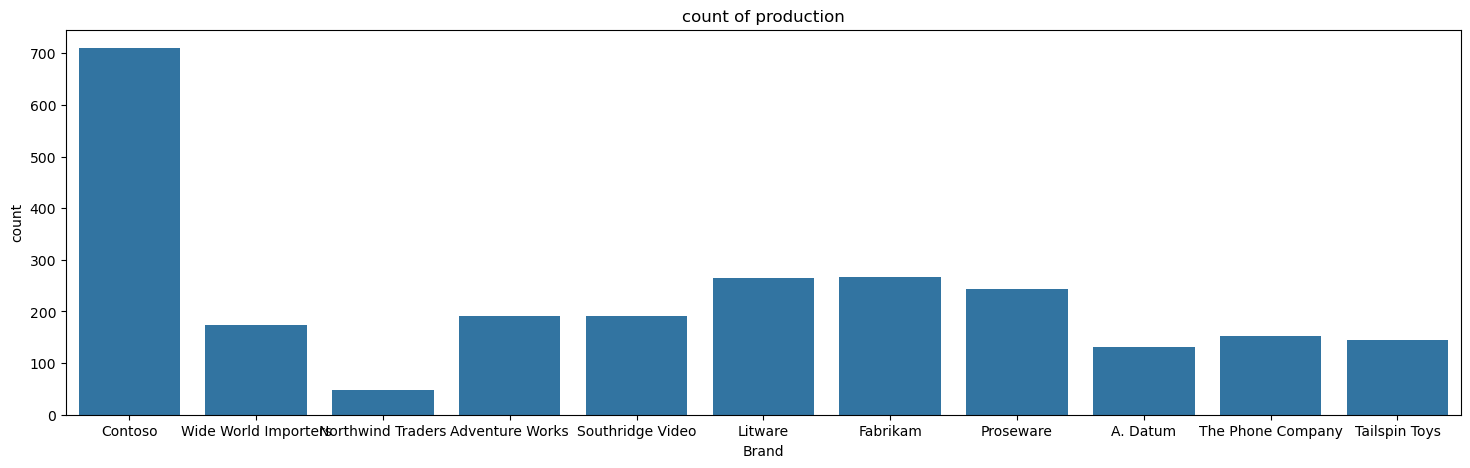

In [25]:
plt.figure(figsize=(18,5))
plt.title('count of production')
sns.countplot(data = data_prod,x='Brand')

<Axes: title={'center': 'count of product colors'}, xlabel='Color', ylabel='count'>

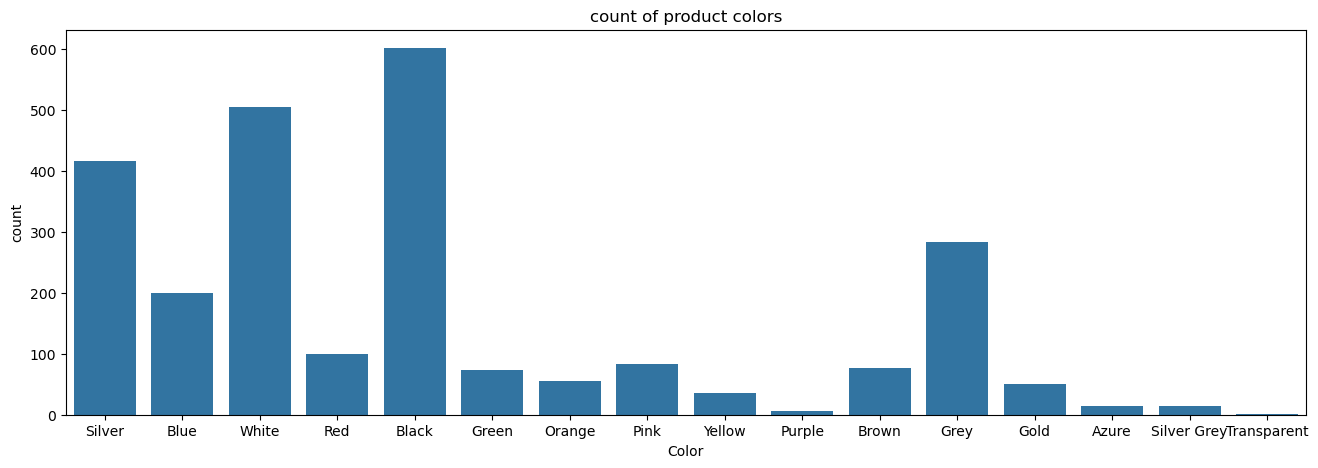

In [27]:
plt.figure(figsize=(16,5))
plt.title('count of product colors')
sns.countplot(data = data_prod,x='Color')

In [45]:
data_prod.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [52]:
data_ER = pd.read_csv('Exchange_Rates (1).csv',encoding='ISO-8859-1') 

In [53]:
data_ER['Date'] = data_ER['Date'].astype('datetime64[ns]')

In [33]:
data_ER.isnull().sum()

Date        0
Currency    0
Exchange    0
dtype: int64

In [47]:
data_ER['Currency'].sort_values(ascending = True)

5607    AUD
3622    AUD
9402    AUD
3627    AUD
3632    AUD
       ... 
4355    USD
4350    USD
9040    USD
4375    USD
0       USD
Name: Currency, Length: 11215, dtype: object

<Axes: xlabel='Exchange', ylabel='Density'>

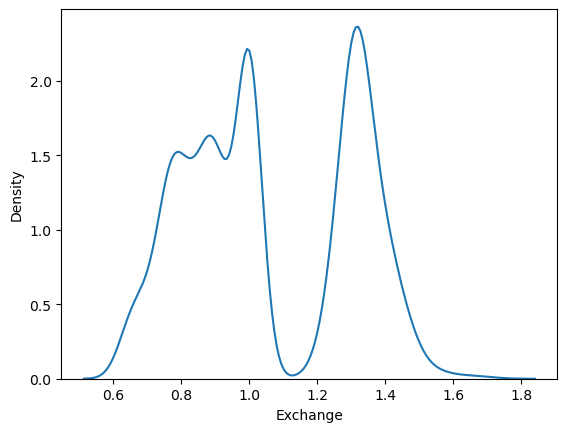

In [39]:
sns.kdeplot(data_ER['Exchange'])

In [37]:
data_ER.head(10)

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415
5,1/2/2015,USD,1.0000
6,1/2/2015,CAD,1.1682
7,1/2/2015,AUD,1.2323
8,1/2/2015,EUR,0.8304
9,1/2/2015,GBP,0.6477


In [31]:
data_ER['Date ].value_counts()

Date
1/1/2015     5
2/7/2019     5
2/1/2019     5
2/2/2019     5
2/3/2019     5
            ..
1/11/2017    5
1/10/2017    5
1/9/2017     5
1/8/2017     5
2/20/2021    5
Name: count, Length: 2243, dtype: int64

data_sal.info()

In [21]:
os.listdir()

['.ipynb_checkpoints',
 'app1.py',
 'Customers (2).csv',
 'data.csv',
 'data.json',
 'Data_Dictionary.csv',
 'data_vis.ipynb',
 'example_csv.csv',
 'example_json.json',
 'exaple_json.json',
 'Exchange_Rates (1).csv',
 'file',
 'health_data.csv',
 'health_data_1.csv',
 'Prob_Stat.pdf',
 'Products.csv',
 'project_2.ipynb',
 'python c2.ipynb',
 'python c3.ipynb',
 'python c4.ipynb',
 'python c5.ipynb',
 'python c6.ipynb',
 'python c8.ipynb',
 'python07.ipynb',
 'python_11 - DF -03.ipynb',
 'r.jpeg',
 'redbus_data_01-Copy1.csv',
 'redbus_data_01.csv',
 'redbus_data_01.xls',
 'redbus_db_conn.ipynb',
 'Sales.csv',
 'scrappy.ipynb',
 'Stats_02_dist_variance.pdf',
 'Stores (1).csv',
 'streamlit.ipynb',
 'visu_01.ipynb']

In [35]:
# plotting for exploration

In [54]:
sales = data_sal.select_dtypes(include='int64')

In [55]:
data_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  62884 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [ ]:
#find correlation between sales data

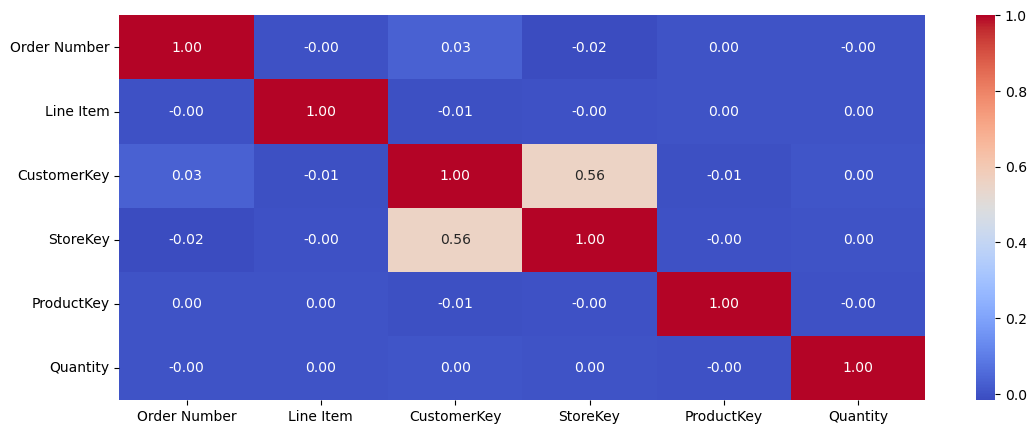

In [69]:
corr = sales.corr()
plt.figure(figsize=(13,5))
sns.heatmap(corr,annot = True,fmt = ".2f",cmap="coolwarm")
plt.show()

In [73]:
data_ER.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


In [75]:
data_ER.head()

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415


In [115]:
data_cust.head(10)

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19
5,1086,Male,Hayden Clegg,TEMPLERS,SA,South Australia,5371,Australia,Australia,1954-01-20
6,1133,Male,Nicholas Caffyn,JUBILEE POCKET,QLD,Queensland,4802,Australia,Australia,1969-11-22
7,1256,Male,Lincoln Jenks,KULLOGUM,QLD,Queensland,4660,Australia,Australia,1950-03-12
8,1314,Male,Isaac Israel,EDITH RIVER,NT,Northern Territory,852,Australia,Australia,1965-12-21
9,1568,Male,Luke Virtue,KOTTA,VIC,Victoria,3565,Australia,Australia,1975-07-25


In [119]:
data_cust.to_csv('data_cust.csv')

In [60]:
data_sal.to_csv('data_sal.csv')

In [61]:
data_prod.to_csv('data_prod.csv')

NameError: name 'data_prod' is not defined

In [135]:
data_ER.to_csv('data_ER.csv')

In [145]:
data_st.to_csv('data_st.csv')

In [296]:
data['Open Date'] = data['Open Date'].astype('datetime64[ns]')

In [139]:
data_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [117]:
data_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerKey  15266 non-null  int64         
 1   Gender       15266 non-null  object        
 2   Name         15266 non-null  object        
 3   City         15266 non-null  object        
 4   State Code   15266 non-null  object        
 5   State        15266 non-null  object        
 6   Zip Code     15266 non-null  object        
 7   Country      15266 non-null  object        
 8   Continent    15266 non-null  object        
 9   Birthday     15266 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 1.2+ MB


In [47]:
data_cust[["State"]].value_counts()

State              
California             715
Ontario                644
Texas                  522
New South Wales        430
New York               423
                      ... 
Trapani                  1
Chiltern                 1
Nuneaton & Bedworth      1
Chesterfield             1
Haringey                 1
Name: count, Length: 512, dtype: int64

In [48]:
data_cust[["Country"]].value_counts()

Country       
United States     6828
United Kingdom    1944
Canada            1553
Germany           1473
Australia         1420
Netherlands        733
France             670
Italy              645
Name: count, dtype: int64

In [41]:
data_cust.groupby(data_cust['Gender'])

<Axes: xlabel='Country', ylabel='count'>

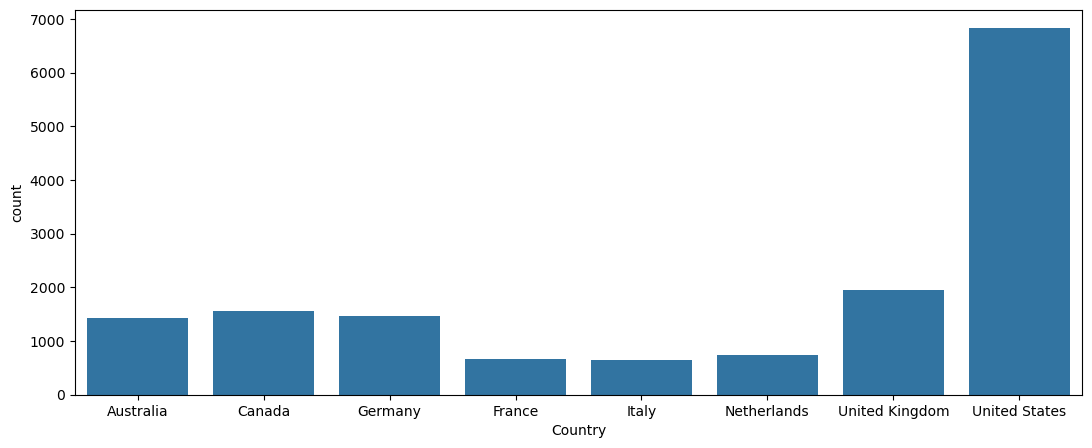

In [55]:
plt.figure(figsize=(13,5))
sns.countplot(data = data_cust,x = 'Country')

In [76]:
data_cust.columns

Index(['CustomerKey', 'Gender', 'Name', 'City', 'State Code', 'State',
       'Zip Code', 'Country', 'Continent', 'Birthday'],
      dtype='object')

In [86]:
data_gen.columns = ['Country','Gender','Counts']

In [90]:
data_gen

,Country,Gender,Counts
0,Australia,Female,721
1,Australia,Male,699
2,Canada,Female,755
3,Canada,Male,798
4,France,Female,351
5,France,Male,319
6,Germany,Female,734
7,Germany,Male,739
8,Italy,Female,319
9,Italy,Male,326


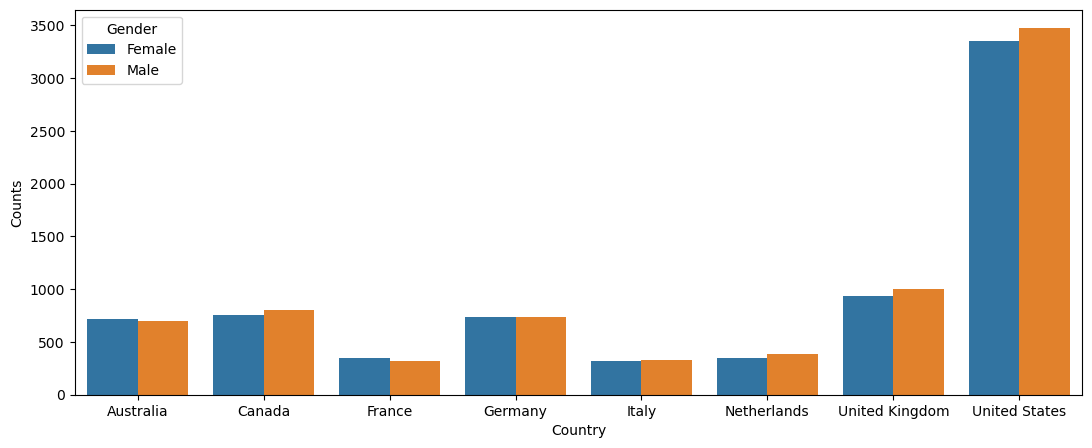

In [91]:
plt.figure(figsize=(13,5))
sns.barplot(data=data_gen,x ='Country',y ='Counts',hue = 'Gender')
plt.show()

In [102]:
data_sal

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,yet to be,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,yet to be,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [104]:
data_sal.head(20)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,yet to be,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
5,366002,3,1/1/2016,1/12/2016,266019,0,1080,4,CAD
6,366004,1,1/1/2016,yet to be,1107461,38,163,6,GBP
7,366004,2,1/1/2016,yet to be,1107461,38,1529,2,GBP
8,366005,1,1/1/2016,yet to be,844003,33,421,4,EUR
9,366007,1,1/1/2016,yet to be,2035771,43,1617,1,USD


In [49]:
prod

,ProductKey,Product Name
0,1,Contoso 512MB MP3 Player E51 Silver
1,2,Contoso 512MB MP3 Player E51 Blue
2,3,Contoso 1G MP3 Player E100 White
3,4,Contoso 2G MP3 Player E200 Silver
4,5,Contoso 2G MP3 Player E200 Red
...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red
2513,2514,Contoso Bluetooth Active Headphones L15 White
2514,2515,Contoso In-Line Coupler E180 White
2515,2516,Contoso In-Line Coupler E180 Black


<Axes: xlabel='StoreKey', ylabel='count'>

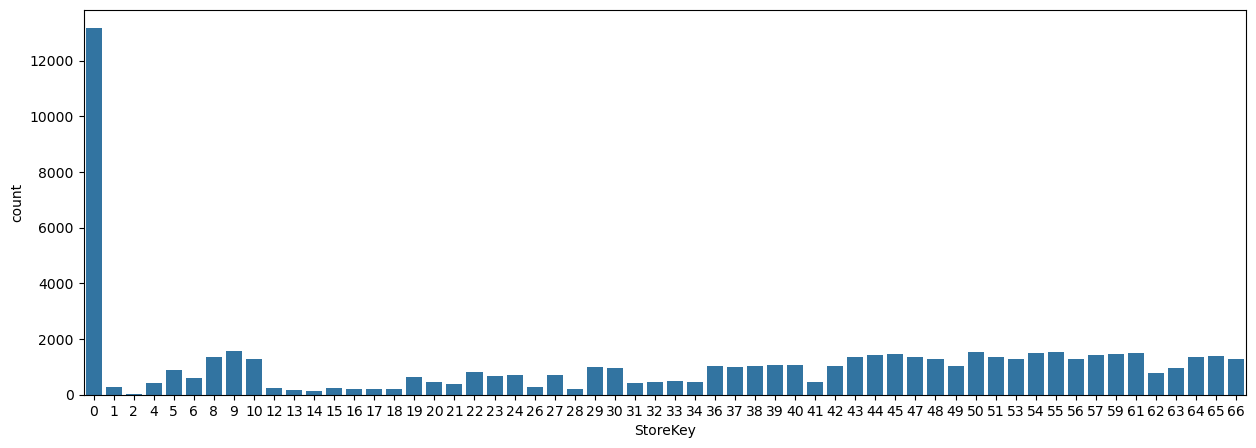

In [71]:
plt.figure(figsize=(15,5))
sns.countplot(data=data_sal,x = 'StoreKey')

In [73]:
data_st

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,2008-01-01
1,2,Australia,Northern Territory,665.0,2008-01-12
2,3,Australia,South Australia,2000.0,2012-01-07
3,4,Australia,Tasmania,2000.0,2010-01-01
4,5,Australia,Victoria,2000.0,2015-12-09
...,...,...,...,...,...
62,63,United States,Utah,2000.0,2008-03-06
63,64,United States,Washington DC,1330.0,2010-01-01
64,65,United States,West Virginia,1785.0,2012-01-01
65,66,United States,Wyoming,840.0,2014-01-01


In [47]:
prod = data_prod[['ProductKey','Product Name']]

In [23]:
data_sal.shape

(62884, 9)

In [99]:
data_sal['CustomerKey'].value_counts()

CustomerKey
723572     36
1579183    32
1925694    32
1942072    29
1972249    29
           ..
974784      1
1068351     1
315725      1
1520217     1
1237927     1
Name: count, Length: 11887, dtype: int64

In [53]:
data_sal['ProductKey'].value_counts()

ProductKey
423     162
446     158
434     158
458     158
448     157
       ... 
2306      1
2346      1
2232      1
2243      1
193       1
Name: count, Length: 2492, dtype: int64

<Axes: xlabel='ProductKey', ylabel='count'>

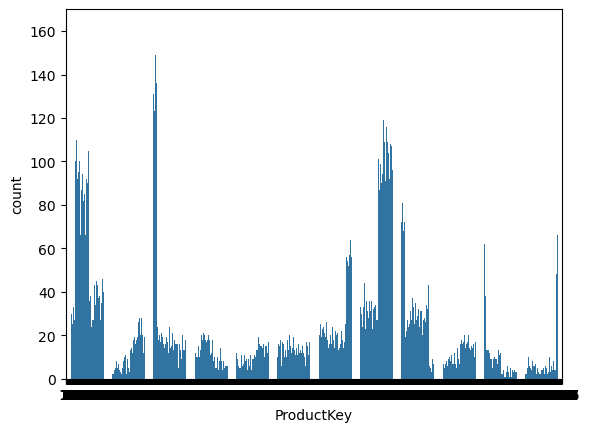

In [19]:
sns.lineplot(data=data_sal, x='ProductKey')

In [106]:
 data_prod

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


#database connection with csv

### Connect sql with csv files

In [19]:
conn = db.connect(
    host = "localhost",
    user = "root",
    password = "root",
    database = "data_spark"
        )

In [21]:
curr = conn.cursor()

In [21]:
data_cust.columns

Index(['CustomerKey', 'Gender', 'Name', 'City', 'State Code', 'State',
       'Zip Code', 'Country', 'Continent', 'Birthday'],
      dtype='object')

In [5]:
curr.execute("""create table cust_tab (
 CustomerKey int primary Key, Gender text,Name text, City text,StateCode text,State text,
 ZipCode text, Country text,Continent text,Birthday text)"""
 )


In [110]:
data.duplicated().sum()

0

In [6]:
with open('data_cust.csv', 'r',encoding='utf-8') as csvfile:
    d1= csv.DictReader(csvfile)
    for i in d1:
        q1 = """INSERT INTO cust_tab (CustomerKey ,Gender,Name, City,StateCode,State ,
   ZipCode , Country ,Continent,Birthday) values ( %s,%s,%s, %s, %s,%s,%s,%s,%s,%s)"""
        v1 = (i['CustomerKey'], i['Gender'],i['Name'], i['City'],i['State Code'],i['State'] ,
   i['Zip Code'] ,i['Country'] ,i['Continent'],i['Birthday'])
        curr.execute(q1,v1)
    conn.commit()

In [148]:
curr.execute("""select * from customer_info""")

In [25]:
data_cust.shape

(15266, 10)

In [88]:
data.iloc[1500,::]

CustomerKey              209922
Gender                     Male
Name                Lee Compton
City                   Kamloops
State Code                   BC
State          British Columbia
Zip Code                V2B 3J5
Country                  Canada
Continent         North America
Birthday             1957-02-16
Name: 1500, dtype: object

In [ ]:
data.loc[data['CustomerKey']=327037,''
]

In [26]:
data = pd.read_csv('data_cust.csv',encoding='ISO-8859-1')

In [104]:
data = data.drop_duplicates()

In [27]:
data.columns

Index(['Unnamed: 0', 'CustomerKey', 'Gender', 'Name', 'City', 'State Code',
       'State', 'Zip Code', 'Country', 'Continent', 'Birthday'],
      dtype='object')

In [36]:
data.to_csv('data.cust.csv')

In [98]:
data

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa DuÂkovÃ¡,Houston,TX,Texas,77017,United States,North America,1936-03-25
15262,2099618,Male,Justin SolÃ³rzano,Mclean,VA,Virginia,22101,United States,North America,1992-02-16
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-11-09
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-10-12


In [7]:
data=pd.read_csv('data_sal.csv',encoding='ISO-8859-1')

In [65]:
data.columns

Index(['Unnamed: 0', 'Order Number', 'Line Item', 'Order Date',
       'Delivery Date', 'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity',
       'Currency Code'],
      dtype='object')

In [66]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [67]:
data.duplicated().sum()

0

In [68]:
data.columns

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code'],
      dtype='object')

In [43]:
sal=pd.read_csv('data_sal.csv',encoding='ISO-8859-1')

In [44]:
sal.head()

,Unnamed: 0,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19


In [69]:
data.to_csv('data_sal.csv')

In [41]:
with open('data_sal.csv', 'r',encoding='ISO-8859-1') as csvfile:
    d1= csv.DictReader(csvfile)
    for i in d1:
        q1 = """INSERT INTO sales_table (Order_Number, Line_Item,Order_Date,
       Delivery_Date ,Customer_Key,Store_Key,Product_Key,Quantity,
       Currency_code) values ( %s,%s,%s, %s, %s,%s,%s,%s,%s)"""
        v1 = (i['Order Number'], i['Line Item'],i['Order Date'], i['Delivery Date'],i['CustomerKey'],i['StoreKey'] ,
   i['ProductKey'] ,i['Quantity'] ,i['Currency Code'])
        curr.execute(q1,v1)
    conn.commit()

In [72]:
data=pd.read_csv('data_prod.csv')

In [73]:
data.columns

Index(['Unnamed: 0', 'ProductKey', 'Product Name', 'Brand', 'Color',
       'Unit Cost USD', 'Unit Price USD', 'SubcategoryKey', 'Subcategory',
       'CategoryKey', 'Category'],
      dtype='object')

In [74]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [226]:
data.duplicated().sum()

0

In [75]:
data.to_csv('data_prod.csv')

In [8]:
curr.execute("""create table prod_table (ProductKey text,Product_Name text,Brand text,Color text,Unit_Cost_USD text,
       Unit_Price_USD text,SubcategoryKey text,Subcategory text,CategoryKey text,
       Category text)"""
 )

In [9]:
with open('data_prod.csv', 'r',encoding='ISO-8859-1') as csvfile:
    d1= csv.DictReader(csvfile)
    for i in d1:
        q1 = """INSERT INTO prod_table (ProductKey,Product_Name,Brand,Color,Unit_Cost_USD,
       Unit_Price_USD,SubcategoryKey,Subcategory,CategoryKey ,Category ) values ( %s,%s,%s, %s, %s,%s,%s,%s,%s,%s)"""
        v1 = (i['ProductKey'], i['Product Name'],i['Brand'], i['Color'],i['Unit Cost USD'],i['Unit Price USD'] ,
      i['SubcategoryKey'] ,i['Subcategory'] ,i['CategoryKey'],i['Category'])
        curr.execute(q1,v1)
    conn.commit()

In [78]:
data=pd.read_csv('data_ER.csv')

In [81]:
data.head()

,Date,Currency,Exchange
0,2015-01-01,USD,1.0000
1,2015-01-01,CAD,1.1583
2,2015-01-01,AUD,1.2214
3,2015-01-01,EUR,0.8237
4,2015-01-01,GBP,0.6415


In [ ]:
data['Date']=data['Date'].astype('datetime64[ns]')

In [ ]:
data.isnull().sum()

In [258]:
data.to_csv('data_ER.csv')

In [260]:
data.columns

Index(['Date', 'Currency', 'Exchange'], dtype='object')

In [10]:
curr.execute(
    """create table ER_table (Date text,Currency text,Exchange text)"""
 )

In [11]:
with open('data_ER.csv', 'r',encoding='ISO-8859-1') as csvfile:
    d1= csv.DictReader(csvfile)
    for i in d1:
        q1 = """INSERT INTO ER_table (Date,Currency,Exchange) values ( %s,%s,%s)"""
        v1 = (i['Date'], i['Currency'],i['Exchange'])
        curr.execute(q1,v1)
    conn.commit()

In [84]:
data=pd.read_csv('data_st.csv')

In [85]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [86]:
data.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    0
Open Date        0
dtype: int64

In [87]:
data.to_csv('data_st.csv')

In [88]:
data.columns

Index(['StoreKey', 'Country', 'State', 'Square Meters', 'Open Date'], dtype='object')

In [37]:
curr.execute(
    """create table stor_table (StoreKey text,Country text,State text,Square_Meters float,Open_Date text)"""
 )

In [41]:
with open('data_st.csv', 'r',encoding='ISO-8859-1') as csvfile:
    d1= csv.DictReader(csvfile)
    for i in d1:
        q1 = """INSERT INTO stor_table(StoreKey,Country,State,Square_Meters,Open_Date) values ( %s,%s,%s, %s, %s)"""
        v1 = (i['StoreKey'], i['Country'],i['State'], i['Square Meters'],i['Open Date'])
        curr.execute(q1,v1)
    conn.commit()

In [8]:
data=pd.read_csv('data_sal.csv')

In [19]:
data.columns

Index(['Unnamed: 0', 'Order Number', 'Line Item', 'Order Date',
       'Delivery Date', 'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity',
       'Currency Code'],
      dtype='object')

In [21]:
data['ProductKey']

ProductKey
423     162
446     158
434     158
458     158
448     157
       ... 
2306      1
2346      1
2232      1
2243      1
193       1
Name: count, Length: 2492, dtype: int64

In [27]:
prod=pd.read_csv('data_prod.csv')

In [41]:
val=data['ProductKey'].value_counts()

In [53]:
prod[prod['ProductKey']==423]

,Unnamed: 0,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
422,422,423,Adventure Works Desktop PC2.30 MD230 Black,Adventure Works,Black,$275.46,$599.00,303,Desktops,3,Computers


In [55]:
data[data['ProductKey']==423]

,Unnamed: 0,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
458,458,386006,5,2016-01-21,yet to be,348548,10,423,1,CAD
1302,1302,420003,6,2016-02-24,3/3/2016,424546,0,423,7,EUR
1499,1499,427001,1,2016-03-02,yet to be,285421,8,423,1,CAD
3067,3067,554006,2,2016-07-07,yet to be,1972624,54,423,1,USD
3332,3332,567008,1,2016-07-20,yet to be,1916770,59,423,2,USD
...,...,...,...,...,...,...,...,...,...,...
62073,62073,2211006,2,2021-01-19,yet to be,801780,34,423,7,EUR
62483,62483,2234007,1,2021-02-11,yet to be,1711599,56,423,2,USD
62593,62593,2239000,1,2021-02-16,2/20/2021,37585,0,423,5,AUD
62673,62673,2240011,4,2021-02-17,yet to be,1632235,53,423,4,USD


In [15]:
data=pd.read_csv('data_sal.csv')

In [17]:
data.head()

,Unnamed: 0,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,0,366000,1,2016-01-01,yet to be,265598,10,1304,1,CAD
1,1,366001,1,2016-01-01,1/13/2016,1269051,0,1048,2,USD
2,2,366001,2,2016-01-01,1/13/2016,1269051,0,2007,1,USD
3,3,366002,1,2016-01-01,1/12/2016,266019,0,1106,7,CAD
4,4,366002,2,2016-01-01,1/12/2016,266019,0,373,1,CAD


In [19]:
data['Order Date'].min()

'2016-01-01'

In [21]:
data['Order Date'].max()

'2021-02-20'

In [25]:
cust=data['CustomerKey'].value_counts()

In [35]:
cust.head(1000)

CustomerKey
723572     36
1579183    32
1925694    32
1942072    29
1972249    29
           ..
370810     11
505288     11
1471397    11
59159      11
452209     11
Name: count, Length: 1000, dtype: int64

In [37]:
data.columns

Index(['Unnamed: 0', 'Order Number', 'Line Item', 'Order Date',
       'Delivery Date', 'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity',
       'Currency Code'],
      dtype='object')

In [43]:
df=data[['CustomerKey','ProductKey']]

In [71]:
prod=data['ProductKey'].value_counts()

In [49]:
data_1=pd.read_csv('data_prod.csv')

In [15]:
cust=pd.read_csv('data_cust.csv')

In [25]:
cust.columns

Index(['Unnamed: 0', 'CustomerKey', 'Gender', 'Name', 'City', 'State Code',
       'State', 'Zip Code', 'Country', 'Continent', 'Birthday'],
      dtype='object')

In [19]:
prod=pd.read_csv('data_prod.csv')

In [31]:
prod.columns

Index(['Unnamed: 0', 'ProductKey', 'Product Name', 'Brand', 'Color',
       'Unit Cost USD', 'Unit Price USD', 'SubcategoryKey', 'Subcategory',
       'CategoryKey', 'Category'],
      dtype='object')

In [9]:
sal=pd.read_csv('data_sal.csv')

In [27]:
sal.columns

Index(['Unnamed: 0', 'Order Number', 'Line Item', 'Order Date',
       'Delivery Date', 'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity',
       'Currency Code'],
      dtype='object')

In [10]:
st=pd.read_csv('data_st.csv')

In [29]:
key=sal[['CustomerKey', 'StoreKey', 'ProductKey']]

In [33]:
key[['SubcategoryKey','CategoryKey']]=prod[['SubcategoryKey','CategoryKey']]

C:\Users\Asin\AppData\Local\Temp\ipykernel_2704\2351897281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key[['SubcategoryKey','CategoryKey']]=prod[['SubcategoryKey','CategoryKey']]
C:\Users\Asin\AppData\Local\Temp\ipykernel_2704\2351897281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key[['SubcategoryKey','CategoryKey']]=prod[['SubcategoryKey','CategoryKey']]


In [16]:
data.columns

Index(['Unnamed: 0', 'Order Number', 'Line Item', 'Order Date',
       'Delivery Date', 'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity',
       'Currency Code'],
      dtype='object')

In [40]:
sal=data.groupby('ProductKey').count()[['Line Item']]

In [39]:
sal_group.isnull().sum()

Line Item    0
dtype: int64

In [11]:
prod=pd.read_csv('data_prod.csv')

In [22]:
prod.columns

Index(['Unnamed: 0', 'ProductKey', 'Product Name', 'Brand', 'Color',
       'Unit Cost USD', 'Unit Price USD', 'SubcategoryKey', 'Subcategory',
       'CategoryKey', 'Category'],
      dtype='object')

In [24]:
prod.shape

(2517, 11)

In [13]:
sal_group[['Product Name', 'Brand', 'Color',
       'Unit Cost USD', 'Unit Price USD', 'SubcategoryKey', 'Subcategory',
       'CategoryKey', 'Category']]=prod[['Product Name', 'Brand', 'Color',
       'Unit Cost USD', 'Unit Price USD', 'SubcategoryKey', 'Subcategory',
       'CategoryKey', 'Category']]

NameError: name 'sal_group' is not defined

In [54]:
sal_group=sal_group.reset_index()

In [59]:
sal_group['Product Counts'] = sal_group['Line Item']

In [70]:
sal_group.columns

Index(['ProductKey', 'Product Name', 'Brand', 'Color', 'Unit Cost USD',
       'Unit Price USD', 'SubcategoryKey', 'Subcategory', 'CategoryKey',
       'Category', 'Product Counts'],
      dtype='object')

In [67]:
sal_group.drop('Line Item',axis=1,inplace=True)

In [12]:
sal_group.to_csv('sal_group.csv')

NameError: name 'sal_group' is not defined

In [14]:
curr.execute("""create table sal_group_table (ProductKey text,Product_Name text,Brand text,Color text,Unit_Cost_USD text,
       Unit_Price_USD text,SubcategoryKey text,Subcategory text,CategoryKey text,
       Category text,Product_Counts text)"""
 )

In [16]:
with open('sal_group.csv', 'r',encoding='ISO-8859-1') as csvfile:
    d1= csv.DictReader(csvfile)
    for i in d1:
        q1 = """INSERT INTO sal_group_table (ProductKey,Product_Name,Brand,Color,Unit_Cost_USD,
       Unit_Price_USD,SubcategoryKey,Subcategory,CategoryKey ,Category,Product_Counts ) values ( %s,%s,%s, %s, %s,%s,%s,%s,%s,%s,%s)"""
        v1 = (i['ProductKey'], i['Product Name'],i['Brand'], i['Color'],i['Unit Cost USD'],i['Unit Price USD'] ,
      i['SubcategoryKey'] ,i['Subcategory'] ,i['CategoryKey'],i['Category'],i['Product Counts'])
        curr.execute(q1,v1)
    conn.commit()

In [18]:
data=pd.read_csv('sal_group.csv')

In [20]:
data.columns

Index(['Unnamed: 0', 'ProductKey', 'Product Name', 'Brand', 'Color',
       'Unit Cost USD', 'Unit Price USD', 'SubcategoryKey', 'Subcategory',
       'CategoryKey', 'Category', 'Product Counts'],
      dtype='object')

In [24]:
data.sort_values('Product Counts',ascending=False,inplace=True)

In [33]:
new_sal=data.head(20)

In [28]:
data.drop(['Unnamed: 0', 'ProductKey',
        'SubcategoryKey'],axis=1,inplace=True)

In [30]:
data.to_csv('sal_group.csv')

In [34]:
new_sal.to_csv('new_sal.csv')

In [31]:
curr.execute("""create table sol_table (Product_Name text,Brand text,Color text,Subcategory text,
       Category text,Product_Counts int,Unit_cost float(32),Unit_prize float(32))"""
 )

In [33]:
with open('sales.csv', 'r',encoding='ISO-8859-1') as csvfile:
    d1= csv.DictReader(csvfile)
    for i in d1:
        q1 = """INSERT INTO sol_table (Product_Name,Brand,Color,
        Subcategory,Category,Product_Counts,Unit_cost,Unit_prize) values ( %s,%s,%s, %s, %s,%s,%s,%s)"""
        v1 = ( i['Product Name'],i['Brand'], i['Color'],i['Subcategory'],i['Category'],i['Product Counts'],
             i['unit_cost'],i['unit_prize'] )
        curr.execute(q1,v1)
    conn.commit()

DatabaseError: 1265 (01000): Data truncated for column 'Unit_prize' at row 1

In [9]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Product Name', 'Brand', 'Color',
       'Subcategory', 'CategoryKey', 'Category', 'Product Counts',
       'unit_prize', 'unit_cost'],
      dtype='object')

In [114]:
df=pd.read_csv('data_sal.csv')

In [45]:
df.columns

Index(['Unnamed: 0', 'Order Number', 'Line Item', 'Order Date',
       'Delivery Date', 'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity',
       'Currency Code'],
      dtype='object')

In [115]:
 df = df.groupby('CustomerKey').count() [['Line Item']].reset_index()

In [116]:
df

,CustomerKey,Line Item
0,301,1
1,325,10
2,554,4
3,1042,3
4,1314,5
...,...,...
11882,2099383,6
11883,2099600,3
11884,2099758,4
11885,2099862,3


In [117]:
df.rename(columns={'CustomerKey':'Prime Customers'},inplace=True)

In [120]:
df.rename(columns={'Line Item':'count of products'},inplace=True)

In [121]:
df.columns

Index(['Prime Customers', 'count of products'], dtype='object')

In [95]:
data=pd.read_csv('data_cust.csv')

In [98]:
data.columns

Index(['Unnamed: 0', 'CustomerKey', 'Gender', 'Name', 'City', 'State Code',
       'State', 'Zip Code', 'Country', 'Continent', 'Birthday'],
      dtype='object')

In [122]:
df[['Gender', 'Name', 'City', 'State Code',
       'State', 'Country', 'Continent', 'Birthday']] = data[[ 'Gender', 'Name', 'City', 'State Code','State',  'Country', 'Continent', 'Birthday']]

In [125]:
prime_cust = df.sort_values('count of products',ascending=False)

In [128]:
prime_cust.columns

Index(['Prime Customers', 'count of products', 'Gender', 'Name', 'City',
       'State Code', 'State', 'Country', 'Continent', 'Birthday'],
      dtype='object')

In [127]:
prime_cust.to_csv('prime_cust.csv')

In [131]:
curr.execute("""create table prime_tab (Prime_Customers text,count_of_products int, 
  Gender text,Name text, City text,StateCode text,State text,
  Country text,Continent text,Birthday text)"""
 )


In [132]:
with open('prime_cust.csv', 'r',encoding='utf-8') as csvfile:
    d1= csv.DictReader(csvfile)
    for i in d1:
        q1 = """INSERT INTO prime_tab ( Prime_Customers,count_of_products,Gender,Name, City,StateCode,State ,
       Country ,Continent,Birthday) values ( %s,%s,%s, %s, %s,%s,%s,%s,%s,%s)"""
        v1 = (i['Prime Customers'],i['count of products'], i['Gender'],i['Name'], i['City'],i['State Code'],i['State'] ,
           i['Country'] ,i['Continent'],i['Birthday'])
        curr.execute(q1,v1)
    conn.commit()

In [27]:
data = pd.read_csv('sal_group.csv')

In [7]:
data.head()

,Unnamed: 0,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,Subcategory,CategoryKey,Category,Product Counts
0,421,Adventure Works Desktop PC2.33 XD233 Black,Adventure Works,Black,$321.05,$969.00,Desktops,3,Computers,162
1,432,Adventure Works Desktop PC2.33 XD233 White,Adventure Works,White,$321.05,$969.00,Desktops,3,Computers,158
2,456,WWI Desktop PC1.60 E1600 White,Wide World Importers,White,$112.14,$219.95,Desktops,3,Computers,158
3,444,WWI Desktop PC2.30 M2300 Black,Wide World Importers,Black,$257.06,$559.00,Desktops,3,Computers,158
4,446,WWI Desktop PC1.80 E1800 Black,Wide World Importers,Black,$117.21,$229.90,Desktops,3,Computers,157


In [9]:
data.shape

(2492, 10)

In [22]:
data.replace('$','',regex = True)

,Unnamed: 0,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,Subcategory,CategoryKey,Category,Product Counts
0,421,Adventure Works Desktop PC2.33 XD233 Black,Adventure Works,Black,$321.05,$969.00,Desktops,3,Computers,162
1,432,Adventure Works Desktop PC2.33 XD233 White,Adventure Works,White,$321.05,$969.00,Desktops,3,Computers,158
2,456,WWI Desktop PC1.60 E1600 White,Wide World Importers,White,$112.14,$219.95,Desktops,3,Computers,158
3,444,WWI Desktop PC2.30 M2300 Black,Wide World Importers,Black,$257.06,$559.00,Desktops,3,Computers,158
4,446,WWI Desktop PC1.80 E1800 Black,Wide World Importers,Black,$117.21,$229.90,Desktops,3,Computers,157
...,...,...,...,...,...,...,...,...,...,...
2487,2238,WWI Floor Lamp M215 White,Wide World Importers,White,$155.89,$339.00,Lamps,8,Home Appliances,1
2488,2229,WWI Floor Lamp X115 Black,Wide World Importers,Black,$210.72,$635.99,Lamps,8,Home Appliances,1
2489,2228,Adventure Works Desk Lamp E1200 Blue,Adventure Works,Blue,$15.29,$29.99,Lamps,8,Home Appliances,1
2490,2320,Litware Chandelier M6015 White,Litware,White,$105.76,$229.99,Lamps,8,Home Appliances,1


In [29]:
df_test = data[['Unit Cost USD','Unit Price USD']]

In [31]:
col = df_test.columns

In [33]:
data[['unit_cost','unit_prize']] = df_test[col].replace({'\$':''},regex = True)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\rupsh\AppData\Local\Temp\ipykernel_840\1967103317.py:1: SyntaxWarning: invalid escape sequence '\$'
  data[['unit_cost','unit_prize']] = df_test[col].replace({'\$':''},regex = True)


In [35]:
data.drop(['Unit Price USD','Unit Cost USD'],axis = 1,inplace = True)

In [49]:
data.columns

Index(['Product Name', 'Brand', 'Color', 'Subcategory', 'CategoryKey',
       'Category', 'Product Counts', 'unit_cost', 'unit_prize'],
      dtype='object')

In [39]:
data.to_csv('sales.csv')

In [41]:
data = pd.read_csv('sales.csv')

In [47]:
data.drop( 'Unnamed: 0.1',axis = 1,inplace = True)

In [51]:
data

,Product Name,Brand,Color,Subcategory,CategoryKey,Category,Product Counts,unit_cost,unit_prize
0,Adventure Works Desktop PC2.33 XD233 Black,Adventure Works,Black,Desktops,3,Computers,162,321.05,969.00
1,Adventure Works Desktop PC2.33 XD233 White,Adventure Works,White,Desktops,3,Computers,158,321.05,969.00
2,WWI Desktop PC1.60 E1600 White,Wide World Importers,White,Desktops,3,Computers,158,112.14,219.95
3,WWI Desktop PC2.30 M2300 Black,Wide World Importers,Black,Desktops,3,Computers,158,257.06,559.00
4,WWI Desktop PC1.80 E1800 Black,Wide World Importers,Black,Desktops,3,Computers,157,117.21,229.90
...,...,...,...,...,...,...,...,...,...
2487,WWI Floor Lamp M215 White,Wide World Importers,White,Lamps,8,Home Appliances,1,155.89,339.00
2488,WWI Floor Lamp X115 Black,Wide World Importers,Black,Lamps,8,Home Appliances,1,210.72,635.99
2489,Adventure Works Desk Lamp E1200 Blue,Adventure Works,Blue,Lamps,8,Home Appliances,1,15.29,29.99
2490,Litware Chandelier M6015 White,Litware,White,Lamps,8,Home Appliances,1,105.76,229.99


In [5]:
data = pd.read_csv('sales.csv')

In [11]:
data.isnull().sum()

Unnamed: 0.1      0
Unnamed: 0        0
Product Name      0
Brand             0
Color             0
Subcategory       0
CategoryKey       0
Category          0
Product Counts    0
unit_cost         0
unit_prize        0
dtype: int64

In [27]:
data.iloc[1,::]

Unnamed: 0.1                                               1
Unnamed: 0                                               432
Product Name      Adventure Works Desktop PC2.33 XD233 White
Brand                                        Adventure Works
Color                                                  White
Subcategory                                         Desktops
CategoryKey                                                3
Category                                           Computers
Product Counts                                           158
unit_cost                                            321.05 
unit_prize                                           969.00 
Name: 1, dtype: object